In [33]:
## Playing with datetime 
from datetime import datetime
import pandas as pd
from copy import deepcopy

my_year = 2021
my_month = 5
my_day= 1
my_date = datetime(my_year, my_month, my_day)
print(my_date)

2021-05-01 00:00:00


In [34]:
my_list = [datetime(2021,1,1), datetime(2021,1,2)]
dt_idx = pd.DatetimeIndex(my_list)
dt_idx

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistics/data/TSLA.csv')
print(df.head())
print(df.describe())

         Date        Open        High  ...       Close   Adj Close     Volume
0  2020-05-01  151.000000  154.554001  ...  140.264008  140.264008  162659000
1  2020-05-04  140.199997  152.399994  ...  152.238007  152.238007   96185500
2  2020-05-05  157.957993  159.783997  ...  153.641998  153.641998   84958500
3  2020-05-06  155.300003  157.960007  ...  156.516006  156.516006   55616000
4  2020-05-07  155.442001  159.279999  ...  156.007996  156.007996   57638500

[5 rows x 7 columns]
             Open        High         Low       Close   Adj Close        Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   490.501097  502.427484  477.002881  490.943459  490.943459  5.353718e+07
std    219.037076  223.011848  213.951295  218.963614  218.963614  2.989942e+07
min    140.199997  152.399994  136.608002  140.264008  140.264008  1.515770e+07
25%    302.217498  309.945999  294.216492  302.002510  302.002510  3.223282e+07
50%    441.340011  449.945008 

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [38]:
df.set_index('Date', inplace=True)

In [39]:
# mean value based off the end of the year resampling
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,368.541566,378.454683,358.214741,369.831953,369.831953,6.259896e+07
2021-12-31,743.344025,759.444267,723.270975,742.028291,742.028291,3.475055e+07


In [40]:
# quarterly resampling
df.resample(rule='Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,176.483143,180.446523,172.655477,177.078286,177.078286,6.291385e+07
2020-09-30,352.975532,365.226126,340.174626,354.207405,354.207405,8.104423e+07
2020-12-31,510.145940,521.626095,498.028124,511.951094,511.951094,4.394705e+07
2021-03-31,755.070000,771.730656,732.933279,753.185899,753.185899,3.559025e+07
2021-06-30,709.282860,723.755232,695.204285,709.618094,709.618094,3.231141e+07


In [41]:
# Shift data by one time period
df.shift(periods=1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04,151.000000,154.554001,136.608002,140.264008,140.264008,162659000.0
2020-05-05,140.199997,152.399994,139.600006,152.238007,152.238007,96185500.0
2020-05-06,157.957993,159.783997,152.436005,153.641998,153.641998,84958500.0
2020-05-07,155.300003,157.960007,152.222000,156.516006,156.516006,55616000.0


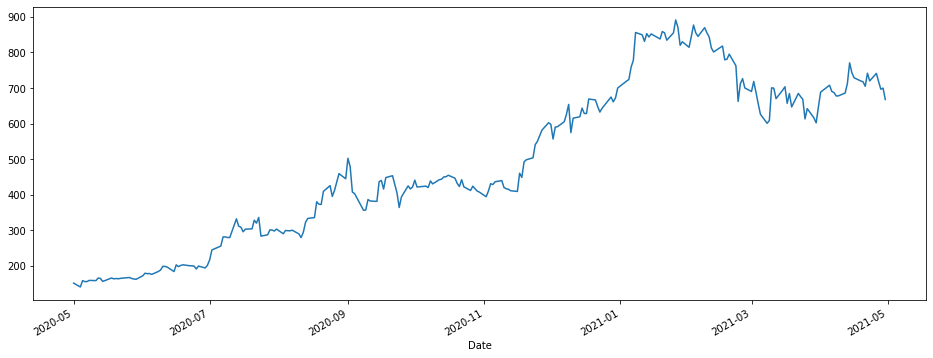

In [42]:
# Plot the Open over all time points
df['Open'].plot(figsize=(16,6))

In [43]:
# Get rolling average of 7 day windows
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-11,153.822285,159.082572,149.962572,154.972859,154.972859,8.858400e+07
2020-05-12,155.879427,161.097430,153.532859,158.061144,158.061144,7.670907e+07
2020-05-13,159.303142,162.926002,155.398573,158.911715,158.911715,7.658650e+07


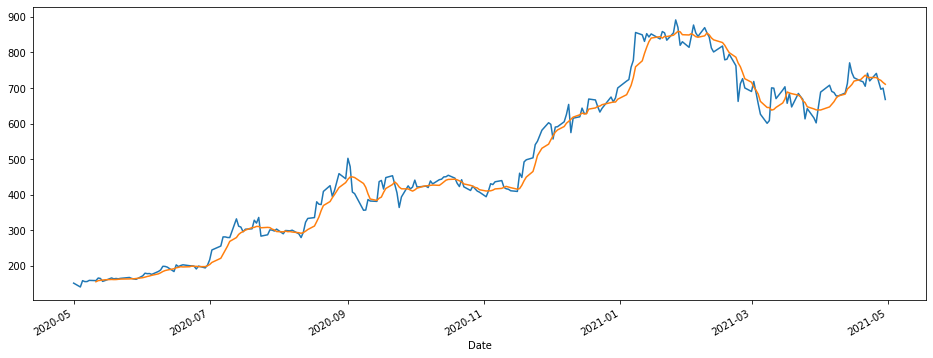

In [44]:
# Rolling average plot
df['Open'].plot()
df.rolling(7).mean()['Close'].plot(figsize=(16,6))

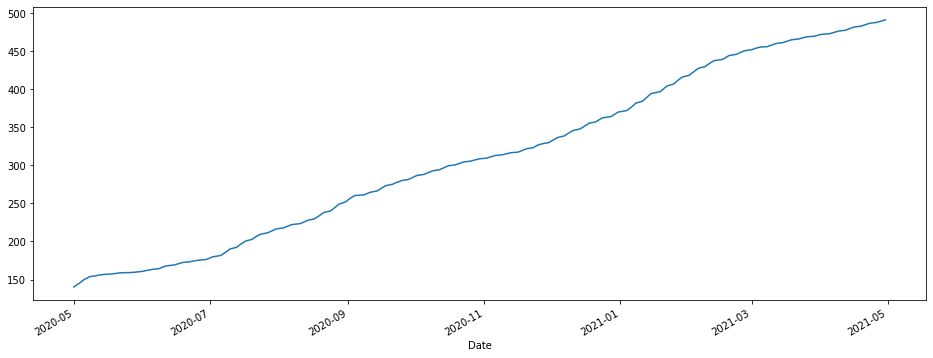

In [45]:
df['Close'].expanding().mean().plot(figsize=(16,6))

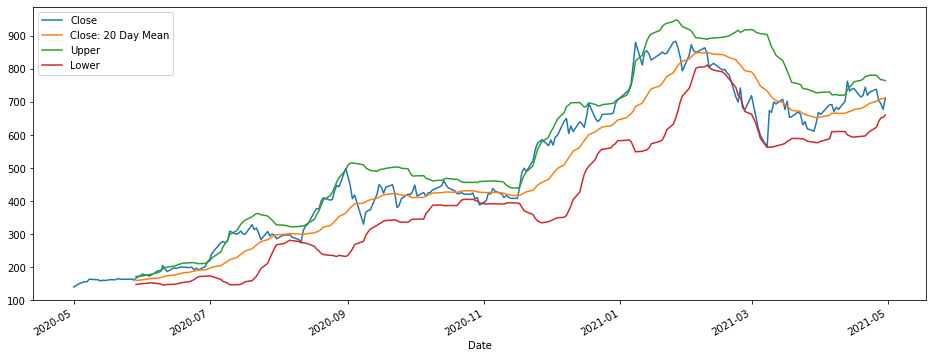

In [46]:
## Bollinger Bands
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())

# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

# Plot Close
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

In [47]:
tsla = deepcopy(df)

In [25]:
# Time series analysis start
import statsmodels.api as sm

# import dataset with load_pandas method and .data attribute
df = sm.datasets.macrodata.load_pandas().data
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [27]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))
df.index = index

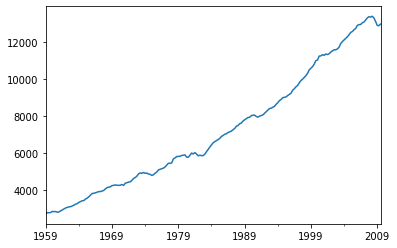

In [28]:
df['realgdp'].plot()

In [29]:
# Let's do some analysis using statsmodel to get the trend of the data,
# and in this case we're going to use the Hodrick-Prescott filter
sm.tsa.filters.hpfilter(df['realgdp'])
# This returns a tuple of the estimated cycle in the data 
# and the estimated trend in the data.

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp, Length: 203, dtype: float64, 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp, Length: 203, dtype: float64)

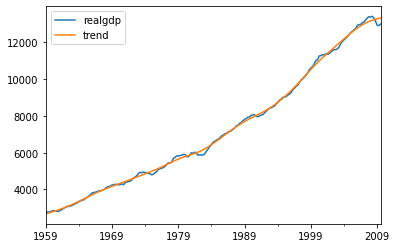

In [30]:
# let's use tuple unpacking to get this trend and plot it on top of this
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

# add a a column for the trend
df['trend'] = gdp_trend

# plot the real gdp & the trend
df[['realgdp','trend']].plot()

In [48]:
### Back to the TESLA dataset
df = deepcopy(tsla)

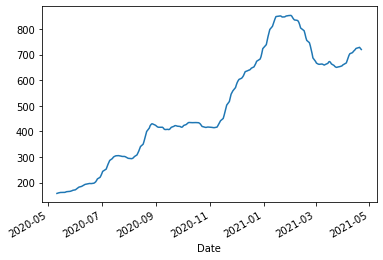

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model='additive', freq=12)
result.trend.plot()

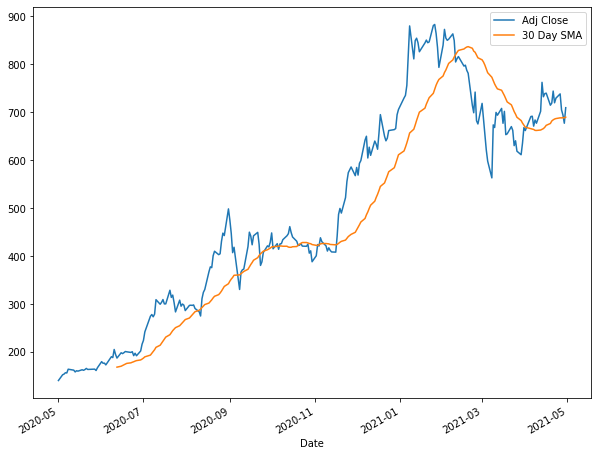

In [50]:
# create 1 month SMA off of Adj Close
df['30 Day SMA'] = df['Adj Close'].rolling(window=30).mean()

# plot SMA & Adj Close
df[['Adj Close', '30 Day SMA']].plot(figsize=(10,8))

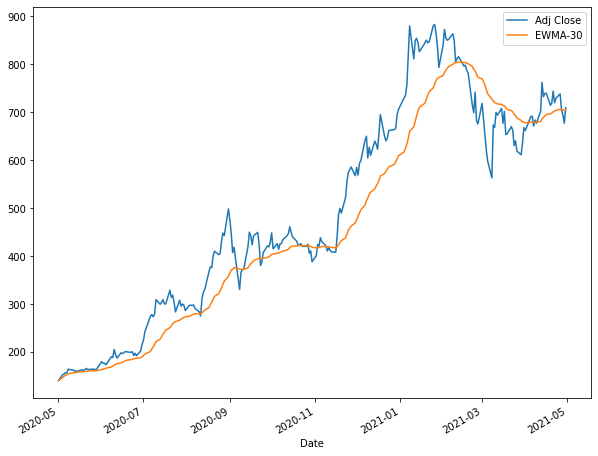

In [51]:
# create EWMA
df['EWMA-30'] = df['Adj Close'].ewm(span=30).mean()

# plot EWMA
df[['Adj Close', 'EWMA-30']].plot(figsize=(10,8))